12


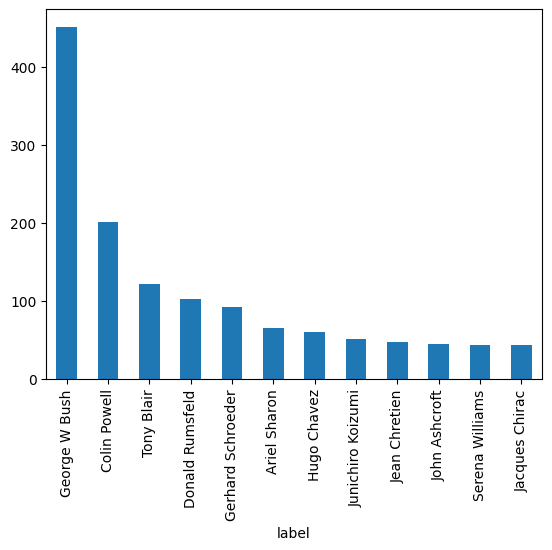

0.049
0.434


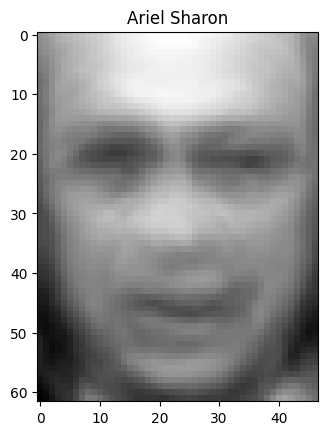

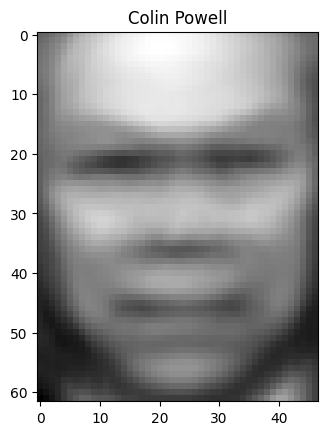

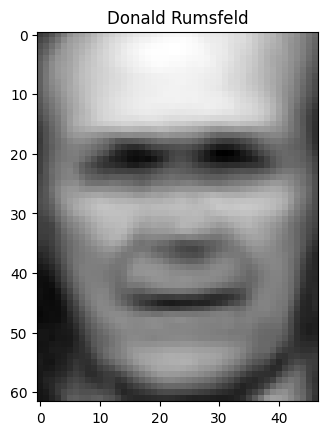

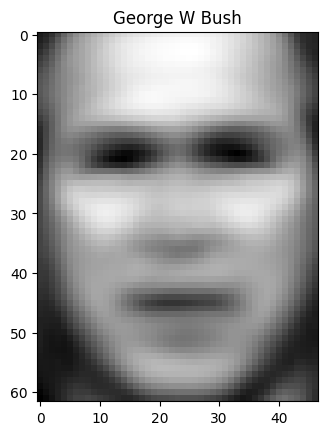

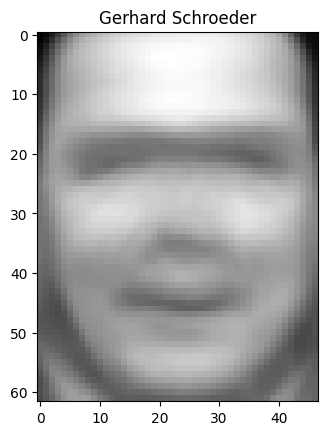

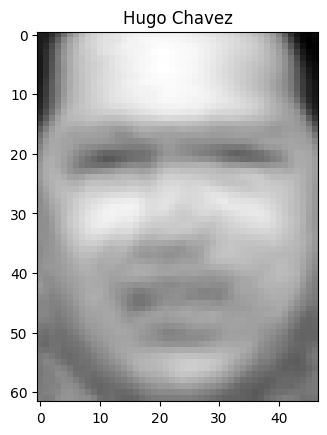

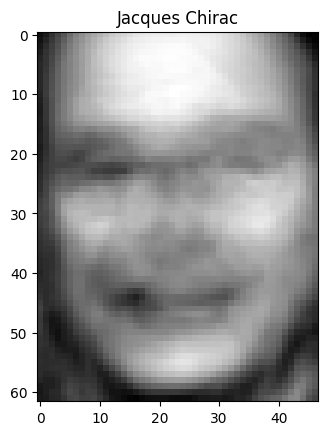

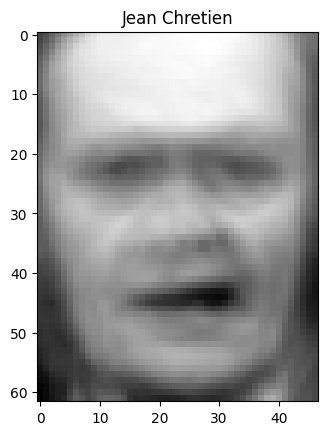

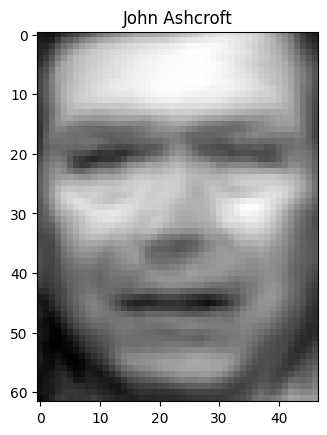

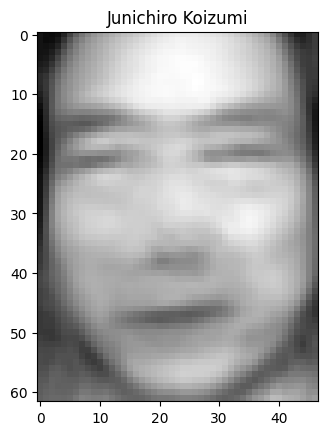

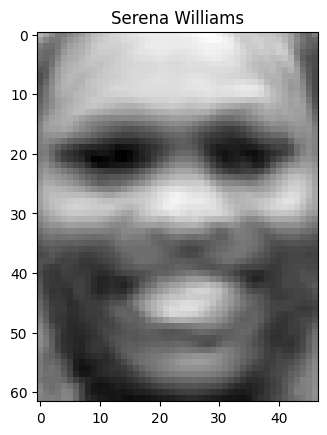

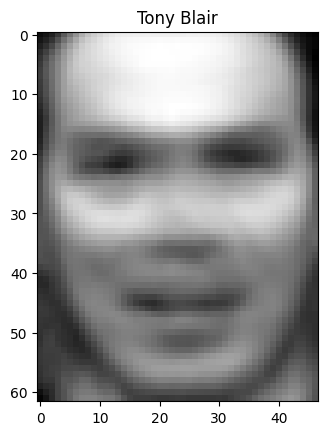

0.995
0.752
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=3;, score=0.802 total time=   0.3s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=3;, score=0.788 total time=   0.3s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=3;, score=0.830 total time=   0.3s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=3;, score=0.807 total time=   0.3s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=3;, score=0.741 total time=   0.3s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=3;, score=0.368 total time=   0.4s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=3;, score=0.377 total time=   0.4s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=3;, score=0.344 total time=   0.4s
[CV 4/5] END C=1, class_weig

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

df = pd.read_csv("./persons_pics_train.csv")

n_people = df['label'].nunique()
print(n_people)

df['label'].value_counts().plot(kind='bar')
plt.show()

share_sharon = (df['label'] == "Ariel Sharon").mean()
print(round(share_sharon, 3))

means = df.groupby('label').mean()

coord_powell_0 = means.loc['Colin Powell'].iloc[0]
print(round(coord_powell_0, 3))

for person in means.index:
    img = means.loc[person].values.reshape(62,47)
    plt.imshow(img, cmap='gray')
    plt.title(person)
    plt.show()

sim = cosine_similarity([means.loc['Colin Powell']], [means.loc['Gerhard Schroeder']])[0][0]
print(round(sim, 3))

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3, stratify=y
)

model = SVC(kernel='linear', random_state=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(f1_score(y_test, pred, average='weighted'), 3))

params = [{
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000],
    'class_weight': [None, 'balanced'],
    'random_state':[3]
}]

cv = GridSearchCV(SVC(), params, refit=True, verbose=3)
cv.fit(X_train, y_train)

best = cv.best_params_
print(round(best['C'],3))
print(round(best['gamma'],3))
print(best['kernel'])

pred2 = cv.predict(X_test)
print(round(f1_score(y_test, pred2, average='weighted'), 3))

pca = PCA(svd_solver='full')
pca.fit(X_train)
k = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
print(k)

pca = PCA(n_components=k, svd_solver='full')
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

cv2 = GridSearchCV(SVC(), params, refit=True, verbose=3)
cv2.fit(X_train_p, y_train)

best2 = cv2.best_params_
print(round(best2['C'],3))
print(round(best2['gamma'],3))
print(best2['kernel'])

pred3 = cv2.predict(X_test_p)
print(round(f1_score(y_test, pred3, average='weighted'), 3))
